# **Data StoryTelling**

En función del abstracto con motivación y audiencia previamente expuesto, para conocer realmente cómo se distribuyen los turnos, podemos identificar que el 80% de estos corresponden a prácticas de FKT (fisiokinesiologia), las cuales NO son de gran incidencia porque son costos muy bajos.


Mounted at /content/gdrive
/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23


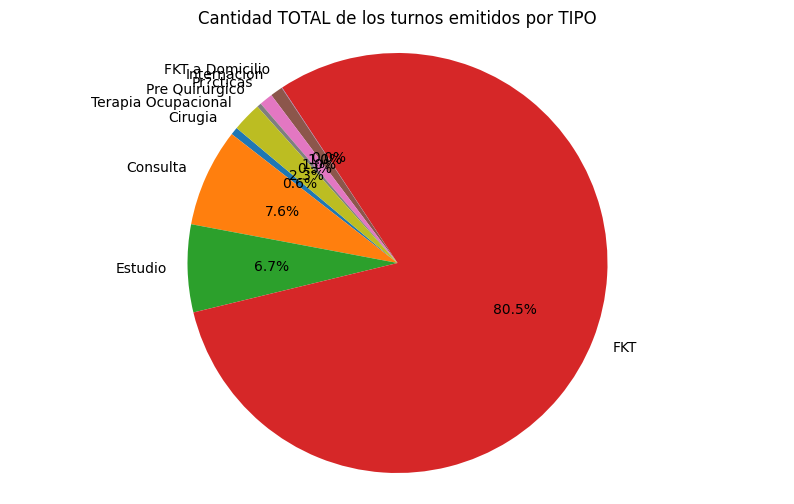

In [1]:
# Paso 1: Cargo el DataSet
import pandas as pd

# Luego cargar drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

# Cambiar a la carpeta de drive
%cd '/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23'

# Cargar el archivo CSV en un dataframe
TURNOS_MEDICOS_df = pd.read_csv('/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23/Turnos_Medicos.csv', sep=';')

# Mostrar la cantidad de turnos por "Provincia Centro Medico" y "Medio de solicitud de turno" en una tabla
#turnos_por_provincia_medio = TURNOS_MEDICOS_df.groupby(['Provincia Centro Medico', 'Medio de solicitud de turno']).size().reset_index(name='Cantidad de Turnos')
#turnos_por_provincia_medio

import pandas as pd
import matplotlib.pyplot as plt

#Este grafico es mas simple, para mostrar una torta con la cantidad de turnos agrupadas por Tipo
codigos_por_tipo_turno = TURNOS_MEDICOS_df.groupby('Tipos Turnos')['Cod Prestacion'].count()

# Crea el grafico:
plt.figure(figsize=(10, 6))
plt.pie(codigos_por_tipo_turno, labels=codigos_por_tipo_turno.index, autopct='%1.1f%%', startangle=140)

# Formateo el grafico
plt.title('Cantidad TOTAL de los turnos emitidos por TIPO')
plt.axis('equal')

# Ejecuto
plt.show()


Si quitamos los turnos de FKT, vamos a poder identificar realmente la distribución de los turnos:

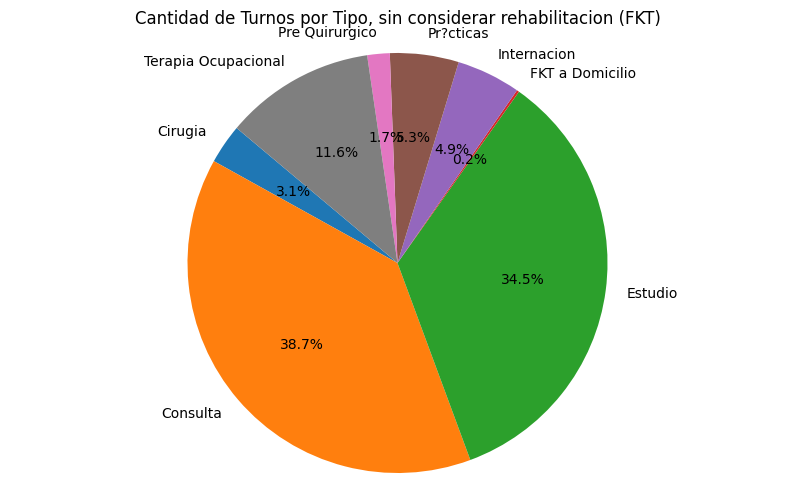

In [2]:
TURNOS_MEDICOS_df_SINFKT = TURNOS_MEDICOS_df[TURNOS_MEDICOS_df['Tipos Turnos'] != "FKT"]

import pandas as pd
import matplotlib.pyplot as plt

#Este grafico es mas simple, para mostrar una torta con la cantidad de turnos agrupadas por Tipo
codigos_por_tipo_turno = TURNOS_MEDICOS_df_SINFKT.groupby('Tipos Turnos')['Cod Prestacion'].count()

# Crea el grafico:
plt.figure(figsize=(10, 6))
plt.pie(codigos_por_tipo_turno, labels=codigos_por_tipo_turno.index, autopct='%1.1f%%', startangle=140)

# Formateo el grafico
plt.title('Cantidad de Turnos por Tipo, sin considerar rehabilitacion (FKT)')
plt.axis('equal')

# Ejecuto
plt.show()


# ¿Cómo se distribuyen los turnos en todo el país?

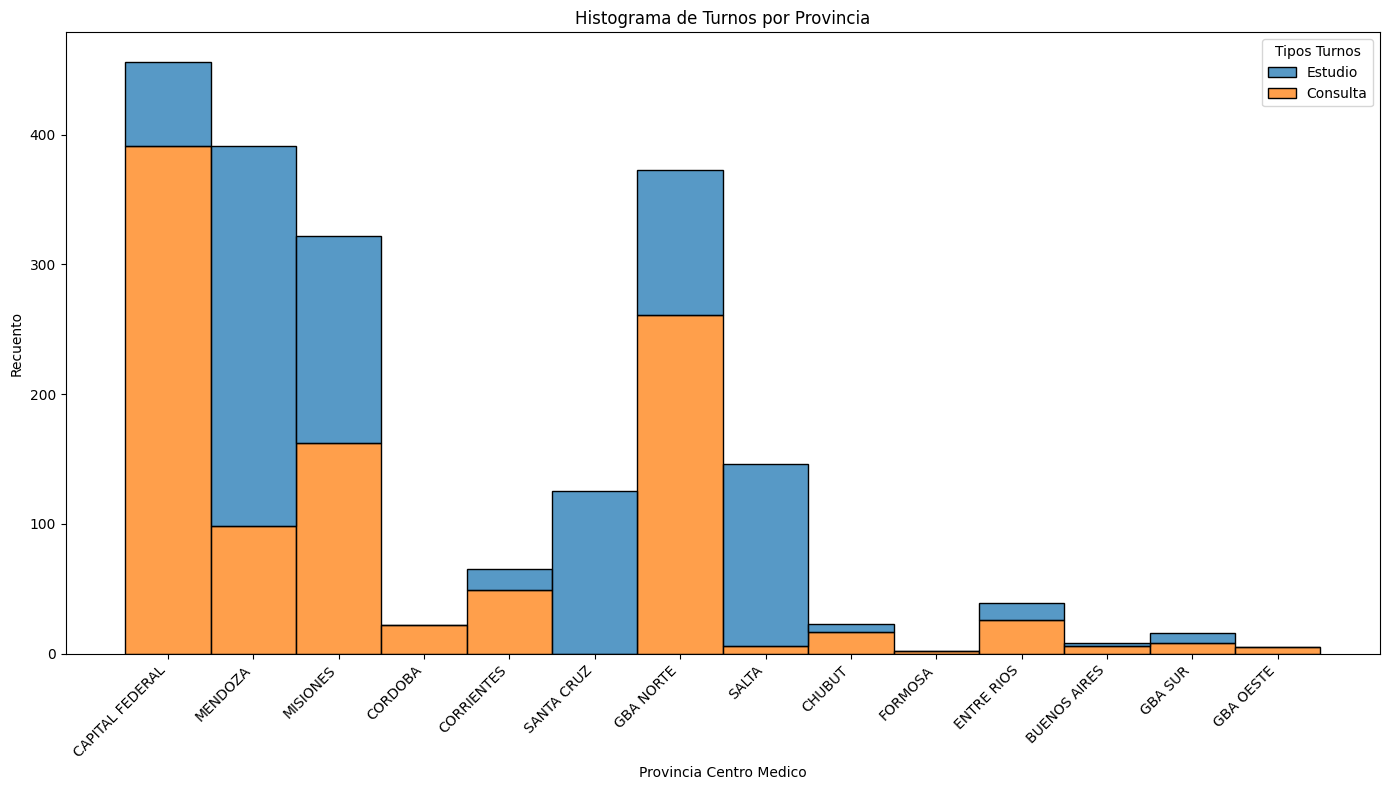

In [9]:
# Este grafico muestra un histograma de olumnas apiladas para ver la cantidad de turnos que se realizaron por provincia, y además se agrupa por tipo de turno en varios colores.
# Filtrar el dataframe para mantener solo los 'Tipos Turnos' que son "Estudio" y "Consulta"
import seaborn as sns

TURNOS_MEDICOS_df_Consultas_Estudios = TURNOS_MEDICOS_df[(TURNOS_MEDICOS_df['Tipos Turnos'] == "Estudio") | (TURNOS_MEDICOS_df['Tipos Turnos'] == "Consulta")]

# Crear el histograma con los datos filtrados
plt.figure(figsize=(14, 8))
sns.histplot(data=TURNOS_MEDICOS_df_Consultas_Estudios, x="Provincia Centro Medico", hue="Tipos Turnos", binwidth=0.4, multiple="stack")

# Formatear el gráfico
plt.title('Histograma de Turnos por Provincia')
plt.xlabel('Provincia Centro Medico')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha="right")

# Ejecutar el gráfico
plt.tight_layout()
plt.show()

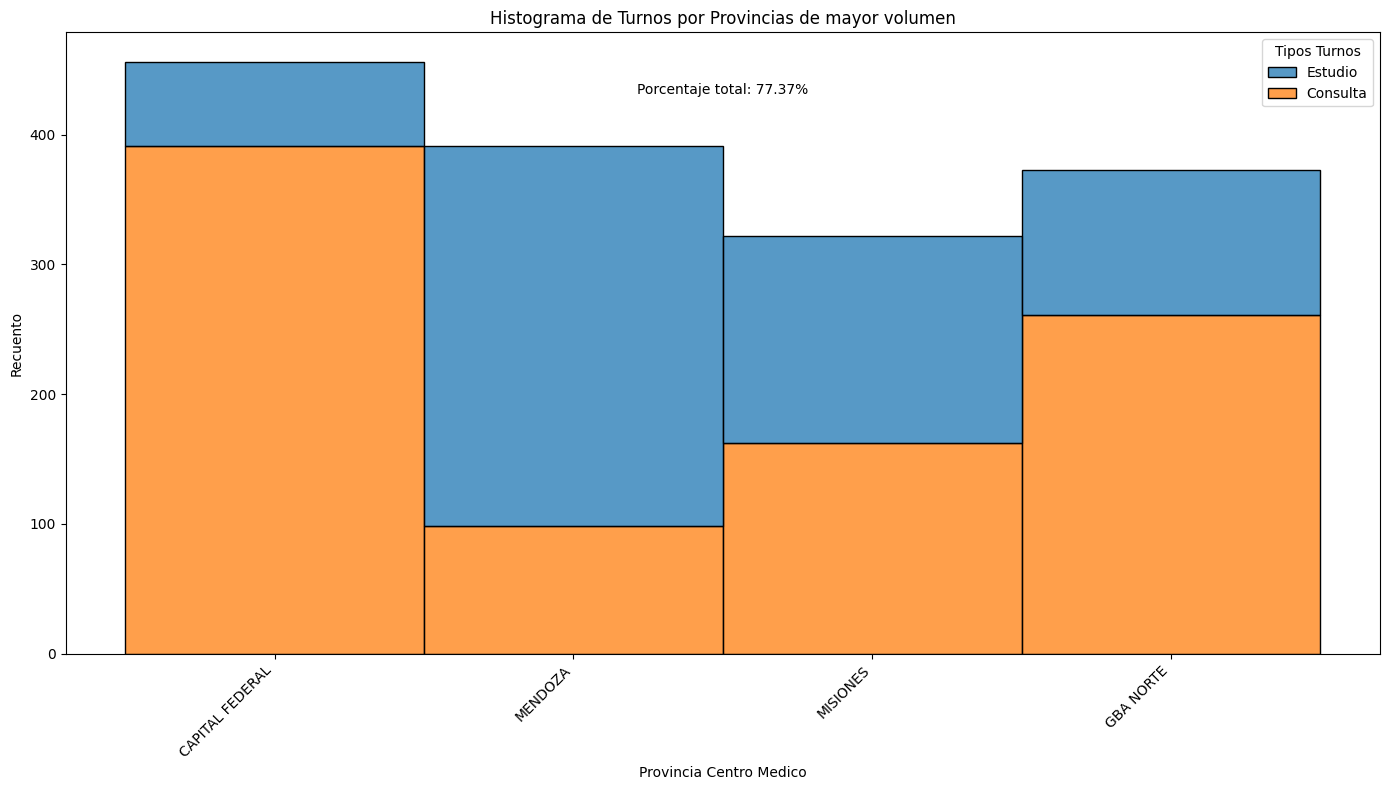

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para mantener solo las provincias especificadas
provincias_seleccionadas = ["CAPITAL FEDERAL", "MENDOZA", "MISIONES", "GBA NORTE"]
TURNOS_MEDICOS_df_Consultas_Estudios_provincias = TURNOS_MEDICOS_df_Consultas_Estudios[TURNOS_MEDICOS_df_Consultas_Estudios['Provincia Centro Medico'].isin(provincias_seleccionadas)]

# Calcular el porcentaje total
total_turnos = len(TURNOS_MEDICOS_df_Consultas_Estudios)
porcentaje_total = (len(TURNOS_MEDICOS_df_Consultas_Estudios_provincias) / total_turnos) * 100

# Crear el histograma con los datos filtrados
plt.figure(figsize=(14, 8))
sns.histplot(data=TURNOS_MEDICOS_df_Consultas_Estudios_provincias, x="Provincia Centro Medico", hue="Tipos Turnos", binwidth=0.4, multiple="stack")

# Agregar porcentaje total como texto en el gráfico
plt.text(0.5, 0.9, f"Porcentaje total: {porcentaje_total:.2f}%", transform=plt.gca().transAxes, ha="center")

# Formatear el gráfico
plt.title('Histograma de Turnos por Provincias de mayor volumen')
plt.xlabel('Provincia Centro Medico')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha="right")

# Ejecutar el gráfico
plt.tight_layout()
plt.show()


Dado este caso, vemos que los turnos con mayor incidencia para la campaña de marketing se están dando en Capital Federal, Mendoza, Misiones, y Gran Buenos Aires (Norte).

Para orientar la campaña de Marketing, veamos la segmentación etárea del público destinatario:

## ¿Qué edad tienen los pacientes de las zonas más concurridas?

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

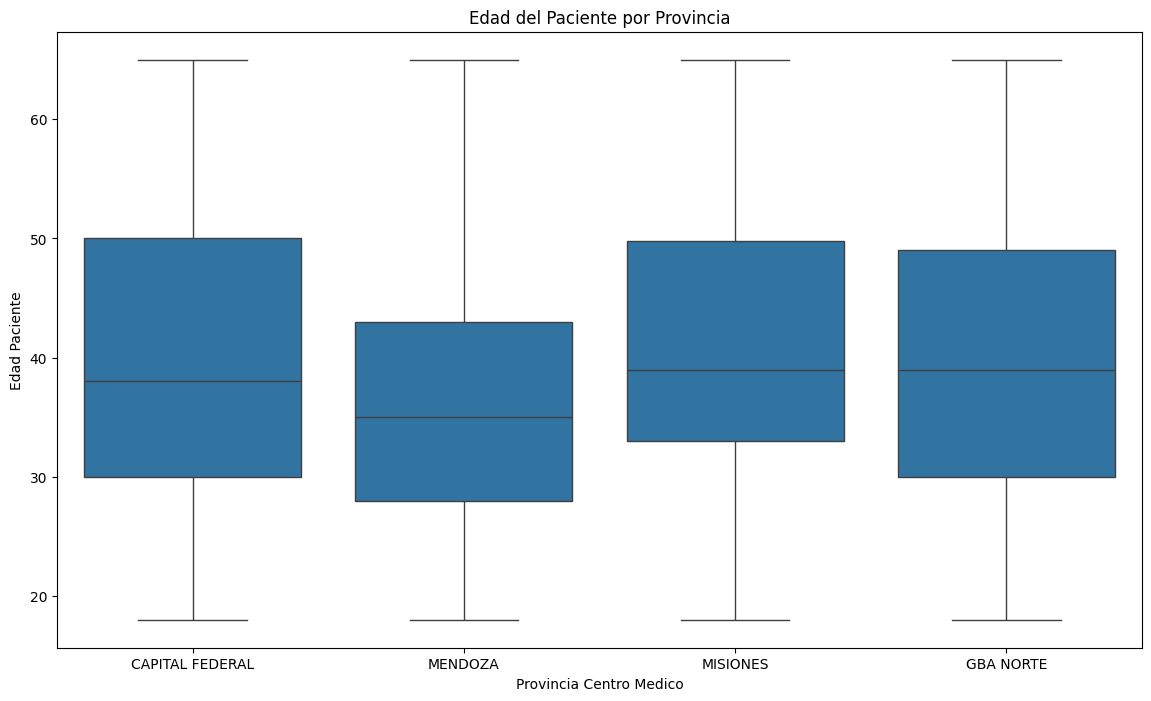

In [10]:
provincias_deseadas = ["CAPITAL FEDERAL", "MENDOZA", "MISIONES", "GBA NORTE"]

# Filtrar el dataframe para mantener solo las provincias deseadas
TURNOS_MEDICOS_df_campaña = TURNOS_MEDICOS_df_Consultas_Estudios[TURNOS_MEDICOS_df_Consultas_Estudios['Provincia Centro Medico'].isin(provincias_deseadas)]


# Crear el boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Provincia Centro Medico', y='Edad Paciente', data=TURNOS_MEDICOS_df_campaña)

# Formatear el gráfico
plt.title('Edad del Paciente por Provincia')
plt.xlabel(TURNOS_MEDICOS_df_Consultas_Estudios)
plt.ylabel('Edad del Paciente')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## ¿Qué medios utilizan estos pacientes para solicitar el turno médico?

Vemos que la franja etárea mayoritariamente se presenta en el rango de 30 a 50 años. Ahora veamos cuáles son los medios utilizados por este público para solicitar estos turnos:

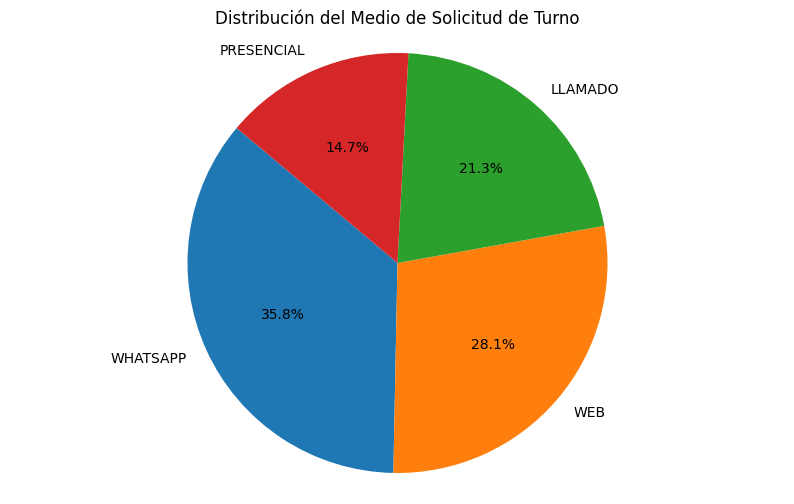

In [6]:
# Contar la cantidad de turnos por medio de solicitud de turno
conteo_por_medio = TURNOS_MEDICOS_df_campaña['Medio de solicitud de turno'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(conteo_por_medio, labels=conteo_por_medio.index, autopct='%1.1f%%', startangle=140)

# Formatear el gráfico
plt.title('Distribución del Medio de Solicitud de Turno')
plt.axis('equal')

# Mostrar el gráfico
plt.show()


Vemos que el público destinatario utiliza un 35% whatsapp, un 28% la solicitud por la web, y en tercer lugar (21%) el llamado telefónico.

Con este análisis, la distribución de recursos para la campaña de marketing deberá centrarse en el público de Capital Federal, Mendoza, Misiones, y Gran Buenos Aires (Norte), de un rango etáreo de 30 a 50 años, y explotando los medios de contacto más utilizados.








---



# **PRIMER ENTREGABLE**
---


# **Abstracto con motivación y audiencia**

La audiencia es el público de pacientes de ART - aseguradora de riesgos de trabajo - los cuales son derivados a turnos en clinicas y sanatorios en todo el país.

Existe una necesidad de impulsar la mejora de los servicios médicos en todo el país, pero dado que son limitados, se necesita estructurar la derivación de recursos en función de volumen de pacientes y tipos de servicios requeridos.

**Preguntas/Hipótesis que queremos resolver:**
1. ¿Existe una relación entre la edad de los pacientes y el medio por el cual se solicitan los turnos?
2. Existen picos o momentos del año en los cuales se incrementa la solicitud de turnos, y de ser así, cómo sería la distribución de esos turnos.



# **Análisis Exploratorio de Datos (EDA)**


Respecto a la relación entre la edad y medio de solicitud de turno:
A. Los grupos de personas hasta 35 años aprox. prefieren utiliza el Whatsapp.
B. Los grupos de 35 a 40 años aprox. prefieren utilizar la web como medio
C. Los grupos de 40 a 60 años aprox prefieren utilizar el llamado o solicitar el turno en forma presencial.

Se recomienda al área de marketing trabajar sobre campañas de fidelización de pacientes/clientes en las plataformas que mayor utilización tiene de acuerdo a la edad del paciente.


Respecto a la relación entre la época/mes del año y el volumen de turnos:
A. Se observa que de enero a marzo son épocas de bajo flujo de pacientes.
B. Se observa que entre abril y diciembre son los meses en los cuales hay mayor cantidad de turnos

Se recomienda al área de marketing orientar el presupuesto de sus campañas mayormente orientados a los meses de abril a diciembre, y realizar campañas de mantenimiento/bajo presupuesto para los meses de enero a marzo.




# **Feature Selection : Wrapper Methods**

---

Se realizar un trabajo de feature selection para reducir la dimensionalidad del dataset "Turnos_Medicos".

Seleccion de variables:
Primero agrupo por cant. de turnos, provincia, y medio de solicitud.
Luego realizo un grafico por cada provincia, y se detecta lo siguiente:


La que mejor ajusta al target (y) es:

In [ ]:
# Paso 1: Cargo el DataSet
import pandas as pd

# Luego cargar drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

# Cambiar a la carpeta de drive
%cd '/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23'

# Cargar el archivo CSV en un dataframe
TURNOS_MEDICOS_df = pd.read_csv('/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23/Turnos_Medicos.csv', sep=';')

# Mostrar la cantidad de turnos por "Provincia Centro Medico" y "Medio de solicitud de turno" en una tabla
#turnos_por_provincia_medio = TURNOS_MEDICOS_df.groupby(['Provincia Centro Medico', 'Medio de solicitud de turno']).size().reset_index(name='Cantidad de Turnos')
#turnos_por_provincia_medio


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23


In [ ]:

#Variable TARGET: Me interesaría predecir el medio que utilizará cada persona para solicitar los turnos en función de su edad

X = TURNOS_MEDICOS_df.drop("Medio de solicitud de turno", 1)       # feature matrix
y = TURNOS_MEDICOS_df['Medio de solicitud de turno']               # target feature
TURNOS_MEDICOS_df.head()

<ipython-input-85-81d414de24fc>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = TURNOS_MEDICOS_df.drop("Medio de solicitud de turno", 1)       # feature matrix


,Id Turno,Tipos Turnos,Cod Prestacion,Prestacion,Cuit Centro Medico,Nombre Centro Medico,Localidad Centro Medico,Provincia Centro Medico,Legajo administrativo,Nombre Administrativo,...,Sector Administrativo,Fecha Autorizacion,Fecha Denuncia,Fecha Turno,ID Afiliado,Nombre Afiliado,Id Autorizacion,Id Denuncia,Medio de solicitud de turno,Edad Paciente
0,921649,Estudio,34.02.13,"RADIOGRAFIA DE CODO, ANTEBRAZO, MU?ECA, MANO, ...",33544086389,CENTRO MEDICO MEDE,CABA,CAPITAL FEDERAL,79315,González,...,AUDITORIA,27/6/2019,2/3/2017,8/2/2022,45055,Gonzalez,610139,138572,WHATSAPP,26
1,921650,Estudio,34.02.13,"RADIOGRAFIA DE CODO, ANTEBRAZO, MU?ECA, MANO, ...",33544086389,CENTRO MEDICO MEDE,CABA,CAPITAL FEDERAL,79315,González,...,AUDITORIA,27/6/2019,2/3/2017,8/2/2022,45055,Gonzalez,610140,138572,WHATSAPP,20
2,3025751,Estudio,34.20.23,RESONANCIA MAGNETICA (RMN) DE RODILLA,30707779183,CENTRO MEDICO FITZ ROY,CABA,CAPITAL FEDERAL,33289,Rodríguez,...,ADMINISTRATIVO,25/4/2023,24/4/2023,27/4/2023,248880,Rodriguez,1446655,355785,WHATSAPP,31
3,3010401,Estudio,34.20.24,RESONANCIA MAGNETICA (RMN) DE HOMBRO,30707779183,CENTRO MEDICO FITZ ROY,CABA,CAPITAL FEDERAL,33289,Rodríguez,...,ADMINISTRATIVO,17/4/2023,14/4/2023,26/4/2023,248228,Lopez,1439909,354479,WHATSAPP,51
4,2665439,Estudio,34.20.23,RESONANCIA MAGNETICA (RMN) DE RODILLA,30707779183,CENTRO MEDICO FITZ ROY,CABA,CAPITAL FEDERAL,33289,Rodríguez,...,ADMINISTRATIVO,22/9/2022,20/9/2022,23/9/2022,238046,Fernandez,1304535,333576,WEB,41


In [ ]:
y

0        WHATSAPP
1        WHATSAPP
2        WHATSAPP
3        WHATSAPP
4             WEB
           ...   
13931         WEB
13932    WHATSAPP
13933    WHATSAPP
13934    WHATSAPP
13935     LLAMADO
Name: Medio de solicitud de turno, Length: 13936, dtype: object

In [ ]:
X

,Id Turno,Tipos Turnos,Cod Prestacion,Prestacion,Cuit Centro Medico,Nombre Centro Medico,Localidad Centro Medico,Provincia Centro Medico,Legajo administrativo,Nombre Administrativo,...,Edad Administrativo,Sector Administrativo,Fecha Autorizacion,Fecha Denuncia,Fecha Turno,ID Afiliado,Nombre Afiliado,Id Autorizacion,Id Denuncia,Edad Paciente
0,921649,Estudio,34.02.13,"RADIOGRAFIA DE CODO, ANTEBRAZO, MU?ECA, MANO, ...",33544086389,CENTRO MEDICO MEDE,CABA,CAPITAL FEDERAL,79315,González,...,32,AUDITORIA,27/6/2019,2/3/2017,8/2/2022,45055,Gonzalez,610139,138572,26
1,921650,Estudio,34.02.13,"RADIOGRAFIA DE CODO, ANTEBRAZO, MU?ECA, MANO, ...",33544086389,CENTRO MEDICO MEDE,CABA,CAPITAL FEDERAL,79315,González,...,32,AUDITORIA,27/6/2019,2/3/2017,8/2/2022,45055,Gonzalez,610140,138572,20
2,3025751,Estudio,34.20.23,RESONANCIA MAGNETICA (RMN) DE RODILLA,30707779183,CENTRO MEDICO FITZ ROY,CABA,CAPITAL FEDERAL,33289,Rodríguez,...,28,ADMINISTRATIVO,25/4/2023,24/4/2023,27/4/2023,248880,Rodriguez,1446655,355785,31
3,3010401,Estudio,34.20.24,RESONANCIA MAGNETICA (RMN) DE HOMBRO,30707779183,CENTRO MEDICO FITZ ROY,CABA,CAPITAL FEDERAL,33289,Rodríguez,...,28,ADMINISTRATIVO,17/4/2023,14/4/2023,26/4/2023,248228,Lopez,1439909,354479,51
4,2665439,Estudio,34.20.23,RESONANCIA MAGNETICA (RMN) DE RODILLA,30707779183,CENTRO MEDICO FITZ ROY,CABA,CAPITAL FEDERAL,33289,Rodríguez,...,28,ADMINISTRATIVO,22/9/2022,20/9/2022,23/9/2022,238046,Fernandez,1304535,333576,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13931,2582026,Estudio,18.01.22,ECOGRAFIA PARTES BLANDAS,30672190726,CENTRO DEL DIAGNOSTICO SRL.,SAN RAFAEL,MENDOZA,35233,Johnson,...,29,ADMINISTRATIVO,5/8/2022,3/8/2022,8/8/2022,234858,Barboza,1271003,328323,35
13932,2582666,Estudio,18.01.22,ECOGRAFIA PARTES BLANDAS,30672190726,CENTRO DEL DIAGNOSTICO SRL.,SAN RAFAEL,MENDOZA,35233,Johnson,...,29,ADMINISTRATIVO,4/8/2022,4/8/2022,8/8/2022,144687,Perez,1271216,328345,26
13933,2582672,Estudio,18.01.22,ECOGRAFIA PARTES BLANDAS,30672190726,CENTRO DEL DIAGNOSTICO SRL.,SAN RAFAEL,MENDOZA,35233,Johnson,...,29,ADMINISTRATIVO,4/8/2022,4/8/2022,8/8/2022,144687,Perez,1271218,328345,27
13934,2582673,Estudio,18.01.22,ECOGRAFIA PARTES BLANDAS,30672190726,CENTRO DEL DIAGNOSTICO SRL.,SAN RAFAEL,MENDOZA,35233,Johnson,...,29,ADMINISTRATIVO,4/8/2022,4/8/2022,8/8/2022,144687,Perez,1271219,328345,24


### Aplico el metodo del codo para clasificar los datos y se deduce que son 3 para agrupar los datos de forma óptima.

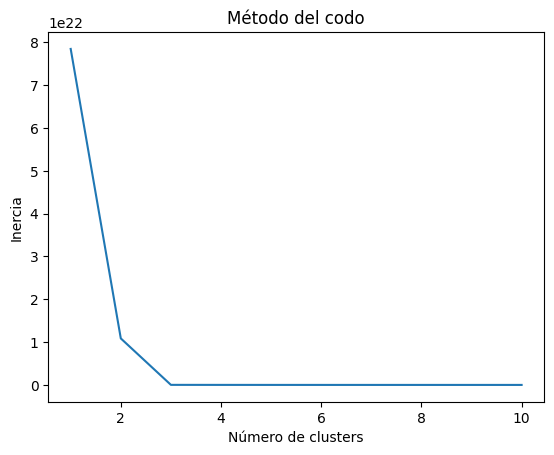

In [ ]:
#Aplico el metodo del codo para clasificar los datos

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Convertir todos los nombres de columnas a tipo string
TURNOS_MEDICOS_encoded.columns = TURNOS_MEDICOS_encoded.columns.astype(str)

# Realizar el método de codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(TURNOS_MEDICOS_encoded)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()





Varianza explicada por cada componente principal: [0.00511355 0.00450435 0.00370293]


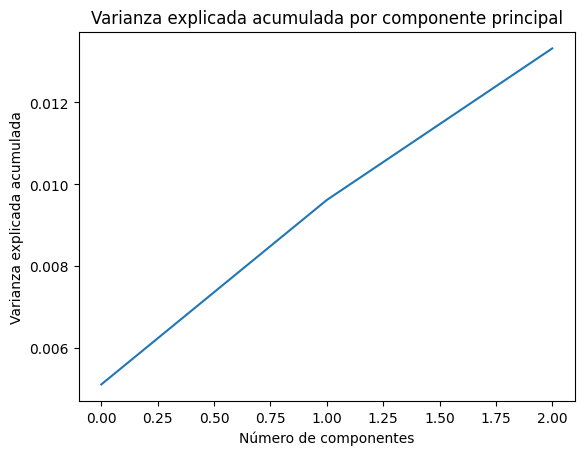

In [ ]:
#Reduzco la dimensionalidad con PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos (es importante escalar los datos antes de aplicar PCA)
scaler = StandardScaler()
TURNOS_MEDICOS_encoded_scaled = scaler.fit_transform(TURNOS_MEDICOS_encoded)

# Aplicar PCA para reducir la dimensionalidad a un número deseado de componentes
num_components = 3  # Especifica el número de componentes que deseas mantener
pca = PCA(n_components=num_components)
TURNOS_MEDICOS_encoded_pca = pca.fit_transform(TURNOS_MEDICOS_encoded_scaled)

# Visualizar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componente principal')
plt.show()

### Utilizo un algoritmo de K-means para agrupar los resultados en 3 clusters como indica el método del codo

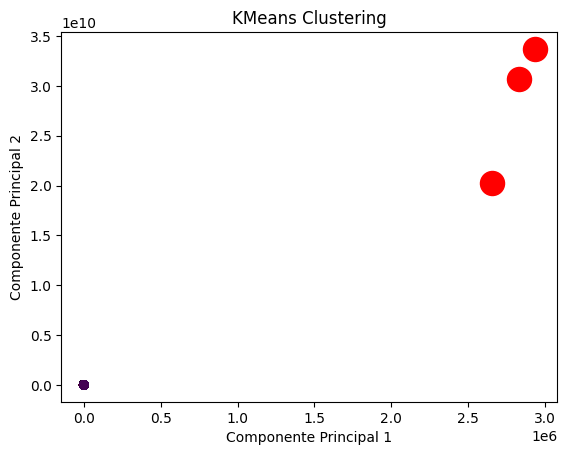

In [ ]:
#Utilizo un algoritmo de K-means para agrupar los resultados en 3 clusters como indica el método del codo

# Definir el número de clusters y crear el modelo KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=3, random_state=0)

# Predecir las asignaciones de cluster para cada punto de datos
pred_y = kmeans.fit_predict(TURNOS_MEDICOS_encoded)

# Graficar los puntos de datos y los centroides de los clusters en función de los componentes principales de PCA
plt.scatter(TURNOS_MEDICOS_encoded_pca[:, 0], TURNOS_MEDICOS_encoded_pca[:, 1], c=pred_y, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('KMeans Clustering')
plt.show()



In [ ]:
#Metricas algoritmos de clasificacion - Se utlizara Accuracy

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir matriz de diseño X y vector respuesta y
X = TURNOS_MEDICOS_encoded
y = TURNOS_MEDICOS_df['Medio de solicitud de turno']

# Separamos en entrenamiento/test en razón 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parámetros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)

# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

# Calculamos la exactitud del modelo
accuracy = accuracy_score(y_test, preds)
print("Exactitud del modelo de test:", accuracy)



Exactitud del modelo de test: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir matriz de diseño X y vector respuesta y
X = TURNOS_MEDICOS_encoded
y = TURNOS_MEDICOS_df['Medio de solicitud de turno']

# Creamos un modelo Random Forest con parámetros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X, y)  # Entrenamos el modelo con todos los datos

# Obtenemos las predicciones del modelo con todos los datos
preds = modelo.predict(X)

# Calculamos la exactitud del modelo
accuracy = accuracy_score(y, preds)
print("Exactitud del modelo con todos los datos:", accuracy)


Exactitud del modelo con todos los datos: 1.0


# Conclusiones con base en los resultados obtenidos

Se realiza el pre procesamiento del dataset obteniendo una agrupación óptima de 3 clústers.
Se realiza un algoritmo de clasificación tanto en test (20%) como los datos completos y dio una precisión de 100%


**Proyecto de DS (parte I) - Abstract**

Hipótesis: Existe una relación entre la edad de los pacientes y el medio por el cual se solicitan los turnos. Los grupos de edades más jóvenes utilizan medios digitales, y los más grandes medios telefónicos/presenciales.

En el gráfico abajo se puede observar la relación que existe entre la edad y los medios utilizados.

* Los grupos de personas hasta 35 años aprox. prefieren utiliza el Whatsapp.
* Los grupos de 35 a 40 años aprox. prefieren utilizar la web como medio
* Los grupos de 40 a 60 años aprox prefieren utilizar el llamado o solicitar el turno en forma presencial.




In [ ]:
#Paso 1: importo pandas
import pandas as pd

#Luego cargo drive
from google.colab import drive
import os
drive.mount('/content/gdrive')

# Cargar carpeta de drive
%cd '/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23'

# Cargar el Primer archivo en un dataframe
TURNOS_MEDICOS_df = pd.read_csv('/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23/Turnos_Medicos.csv', sep = ';', index_col=0)


#Cargo las librerias de MatPlotlib y Seaborn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/CODER HOUSE - DATA/Primer entregable 21.12.23


In [ ]:
#Visualizo los datos del dataset

#Veo los encabezados de fecha que se vean bien

TURNOS_MEDICOS_df.head

<bound method NDFrame.head of          Tipos Turnos Cod Prestacion  \
Id Turno                               
921649        Estudio       34.02.13   
921650        Estudio       34.02.13   
3025751       Estudio       34.20.23   
3010401       Estudio       34.20.24   
2665439       Estudio       34.20.23   
...               ...            ...   
2582026       Estudio       18.01.22   
2582666       Estudio       18.01.22   
2582672       Estudio       18.01.22   
2582673       Estudio       18.01.22   
2591380       Estudio       18.01.22   

                                                 Prestacion  \
Id Turno                                                      
921649    RADIOGRAFIA DE CODO, ANTEBRAZO, MU?ECA, MANO, ...   
921650    RADIOGRAFIA DE CODO, ANTEBRAZO, MU?ECA, MANO, ...   
3025751               RESONANCIA MAGNETICA (RMN) DE RODILLA   
3010401                RESONANCIA MAGNETICA (RMN) DE HOMBRO   
2665439               RESONANCIA MAGNETICA (RMN) DE RODILLA   
...                                                     ...   
2582026                            ECOGRAFIA PARTES BLANDAS   
2582666                            ECOGRAFIA PARTES BLANDAS   
2582672                            ECOGRAFIA PARTES BLANDAS   
2582673                            ECOGRAFIA PARTES BLANDAS   
2591380                            ECOGRAFIA PARTES BLANDAS   

          Cuit Centro Medico         Nombre Centro Medico  \
Id Turno                                                    
921649           33544086389           CENTRO MEDICO MEDE   
921650           33544086389           CENTRO MEDICO MEDE   
3025751          30707779183       CENTRO MEDICO FITZ ROY   
3010401          30707779183       CENTRO MEDICO FITZ ROY   
2665439          30707779183       CENTRO MEDICO FITZ ROY   
...                      ...                          ...   
2582026          30672190726  CENTRO DEL DIAGNOSTICO SRL.   
2582666          30672190726  CENTRO DEL DIAGNOSTICO SRL.   
2582672          30672190726  CENTRO DEL DIAGNOSTICO SRL.   
2582673          30672190726  CENTRO DEL DIAGNOSTICO SRL.   
2591380          30672190726  CENTRO DEL DIAGNOSTICO SRL.   

         Localidad Centro Medico Provincia Centro Medico  \
Id Turno                                                   
921649                      CABA         CAPITAL FEDERAL   
921650                      CABA         CAPITAL FEDERAL   
3025751                     CABA         CAPITAL FEDERAL   
3010401                     CABA         CAPITAL FEDERAL   
2665439                     CABA         CAPITAL FEDERAL   
...                          ...                     ...   
2582026               SAN RAFAEL                 MENDOZA   
2582666               SAN RAFAEL                 MENDOZA   
2582672               SAN RAFAEL                 MENDOZA   
2582673               SAN RAFAEL                 MENDOZA   
2591380               SAN RAFAEL                 MENDOZA   

          Legajo administrativo Nombre Administrativo Nombre Administrativo.1  \
Id Turno                                                                        
921649                    79315           González                   Juan       
921650                    79315           González                   Juan       
3025751                   33289          Rodríguez                  María       
3010401                   33289          Rodríguez                  María       
2665439                   33289          Rodríguez                  María       
...                         ...                   ...                     ...   
2582026                   35233           Johnson                   Andrés      
2582666                   35233           Johnson                   Andrés      
2582672                   35233           Johnson                   Andrés      
2582673                   35233           Johnson                   Andrés      
2591380                   35233           Johnson                   Andrés      



<ipython-input-12-37baf17b6c4d>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  TURNOS_MEDICOS_df['Fecha Turno'] = pd.to_datetime(TURNOS_MEDICOS_df['Fecha Turno'])


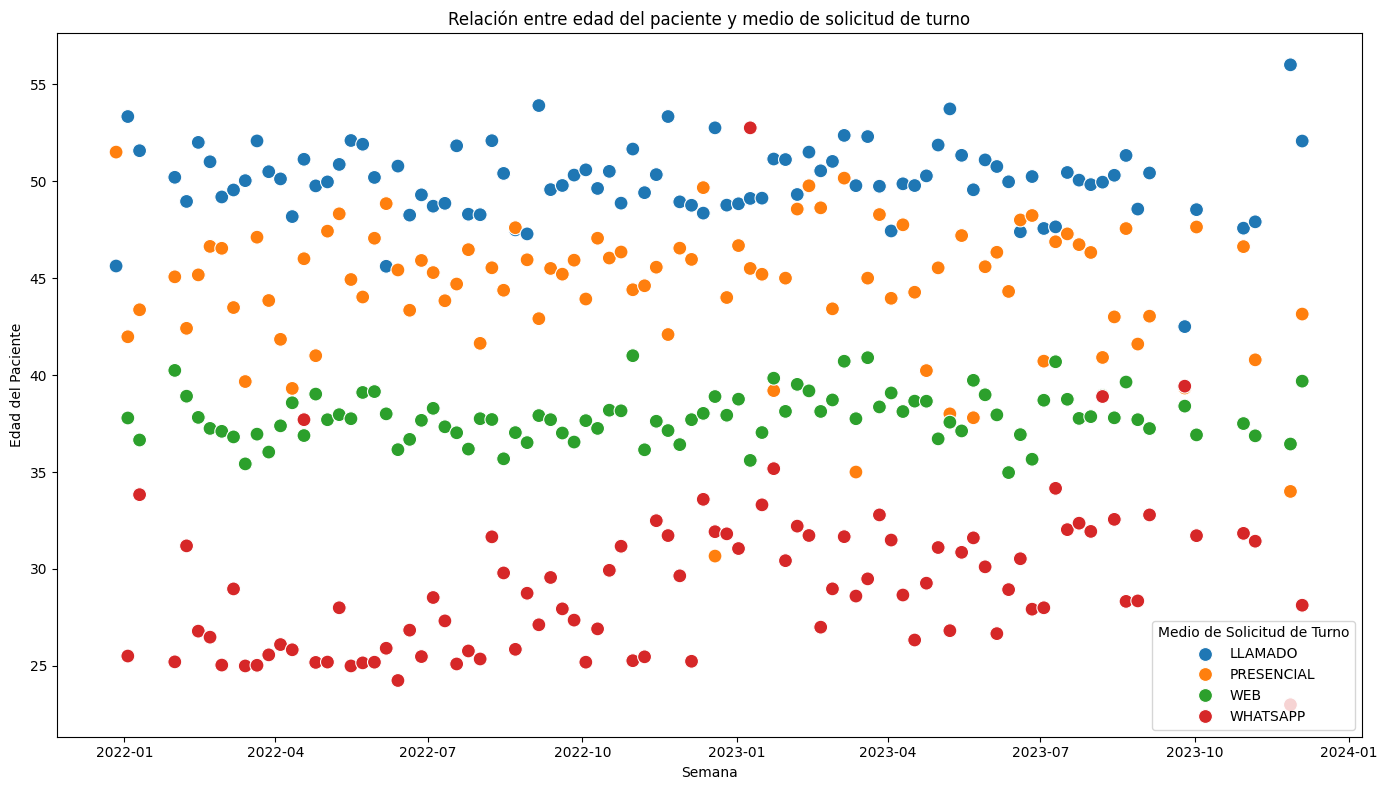

In [ ]:
#PRIMERA PRUEBA DE HIPOTESIS
#Realizo un gráfico para comparar la edad con los medios de turnos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertimos 'Fecha Turno' a tipo datetime y creamos una nueva columna 'Semana'
TURNOS_MEDICOS_df['Fecha Turno'] = pd.to_datetime(TURNOS_MEDICOS_df['Fecha Turno'])
TURNOS_MEDICOS_df['Semana'] = TURNOS_MEDICOS_df['Fecha Turno'].dt.to_period('W')

# Agrupa por semana, medio de solicitud de turno y calcula la edad media para cada combinación
edad_promedio_por_medio_semana = TURNOS_MEDICOS_df.groupby(['Semana', 'Medio de solicitud de turno'])['Edad Paciente'].mean().reset_index()
edad_promedio_por_medio_semana['Semana'] = edad_promedio_por_medio_semana['Semana'].dt.to_timestamp()

# En este gráfico, utilizaremos un scatter plot para comparar la edad promedio de los pacientes por medio de solicitud de turno
#Armamos el scatterplot comparando la edad de los pacientes en el eje Y, y la fecha en la X (Agrupado por semanas)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Semana', y='Edad Paciente', hue='Medio de solicitud de turno', data=edad_promedio_por_medio_semana, s=100)

# Formateo del grafico
plt.title('Relación entre edad del paciente y medio de solicitud de turno')
plt.xlabel('Semana')
plt.ylabel('Edad del Paciente')
plt.legend(title='Medio de Solicitud de Turno')

# Muestra el gráfico
plt.tight_layout()
plt.show()


# Análisis general del Dataset - Gráficos

### Recuento de los turnos emitidos agrupados por medio utilizado para la solicitud en relación a la edad del paciente:


<ipython-input-7-64834a1c59ec>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Medio de solicitud de turno', y='Edad Paciente', data=turnos_por_medio_y_edad, ci=None)


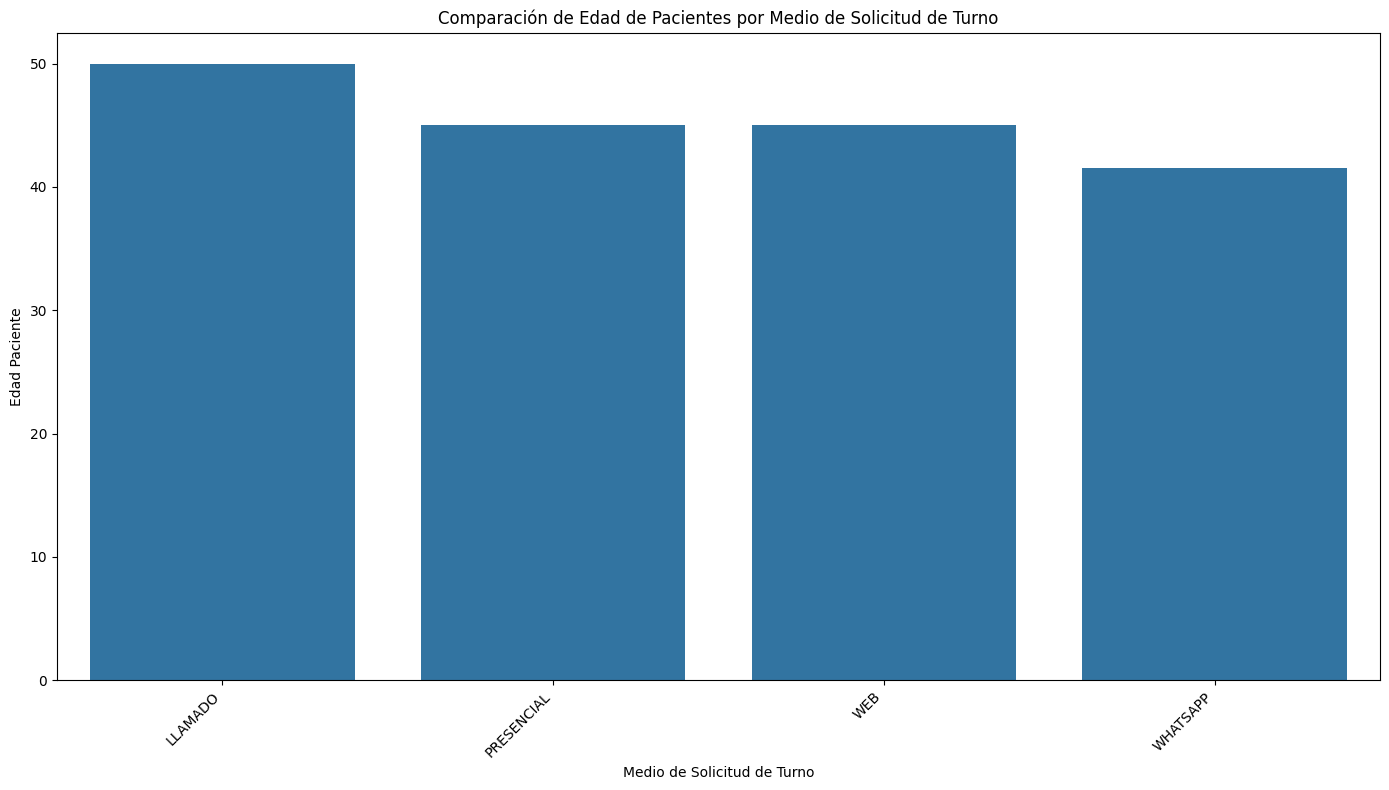

In [ ]:
#Primer Grafico con MatPlotlib

#Utilizo este grafico para hacer un recuento de los turnos emitidos.

import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa por medio de solicitud de turno y edad, contando la cantidad de turnos
turnos_por_medio_y_edad = TURNOS_MEDICOS_df.groupby(['Medio de solicitud de turno', 'Edad Paciente'])['Cod Prestacion'].count().reset_index()

# En este gráfico, utilizaremos un gráfico de barras para comparar la edad de los pacientes por medio de solicitud de turno
plt.figure(figsize=(14, 8))
sns.barplot(x='Medio de solicitud de turno', y='Edad Paciente', data=turnos_por_medio_y_edad, ci=None)

# Formateo
plt.title('Comparación de Edad de Pacientes por Medio de Solicitud de Turno')
plt.xlabel('Medio de Solicitud de Turno')
plt.ylabel('Edad Paciente')
plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.tight_layout()
plt.show()


### Recuento simple de turnos generados a lo largo del tiempo

<ipython-input-4-9e9b23fc389c>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  TURNOS_MEDICOS_df['Fecha Turno'] = pd.to_datetime(TURNOS_MEDICOS_df['Fecha Turno'])


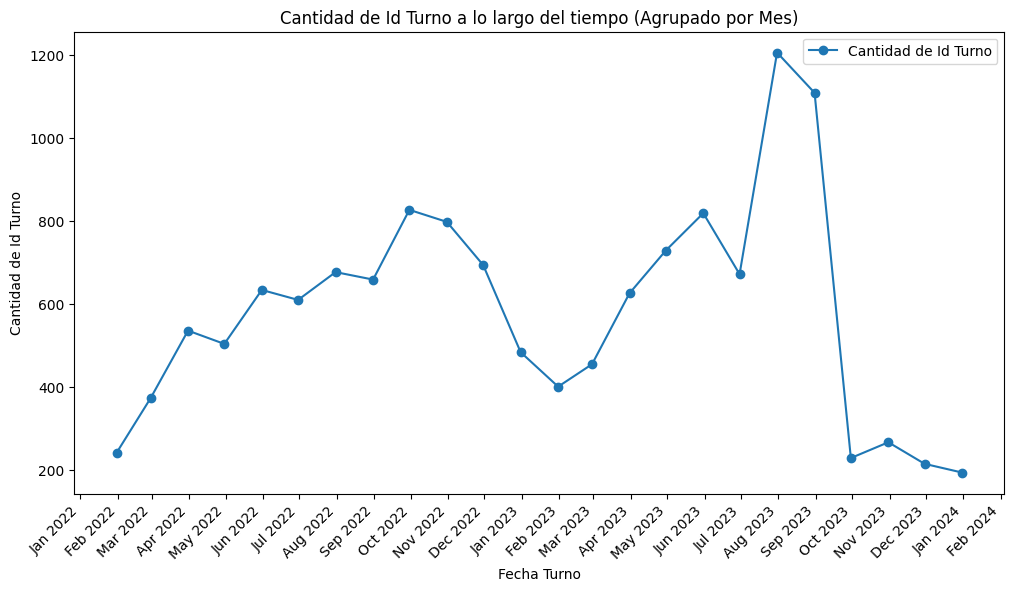

In [ ]:
#Segundo Grafico con MatPlotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Este grafico muestra la cantidad emitido agrupado por mes.
#Defino que la fecha tenga el formato correcto.
TURNOS_MEDICOS_df['Fecha Turno'] = pd.to_datetime(TURNOS_MEDICOS_df['Fecha Turno'])

# Ordeno el DataFrame para asegurar un gráfico ordenado en el tiempo
TURNOS_MEDICOS_df = TURNOS_MEDICOS_df.sort_values(by='Fecha Turno')

# Agrupa por 'Fecha Turno' y cuenta la cantidad de 'Id Autorizacion' en cada fecha
recuento_id_turnos_por_fecha = TURNOS_MEDICOS_df.groupby('Fecha Turno')['Id Autorizacion'].count()

# Sumo las fechas agrupadas por mes
recuento_id_turnos_por_fecha = recuento_id_turnos_por_fecha.resample('M').sum()

# Creo el grafico de lineas
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(recuento_id_turnos_por_fecha.index, recuento_id_turnos_por_fecha.values, label='Cantidad de Id Turno', marker='o')

# Formateo el grafico
ax.set_xlabel('Fecha Turno')
ax.set_ylabel('Cantidad de Id Turno')
ax.set_title('Cantidad de Id Turno a lo largo del tiempo (Agrupado por Mes)')
ax.legend()

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45, ha='right')

#Ejecuto el grafico
plt.show()


### Recuento simple de turnos clasificados por tipo de prestación médica

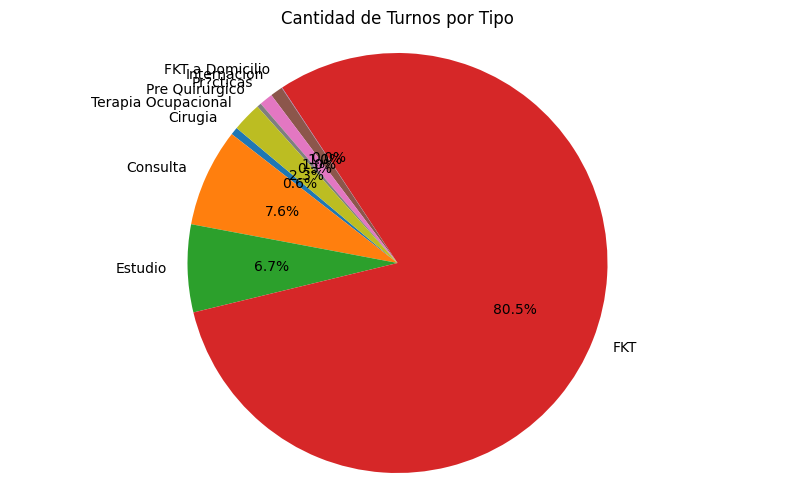

In [ ]:
#Tercer grafico con MatPlotlib
import pandas as pd
import matplotlib.pyplot as plt

#Este grafico es mas simple, para mostrar una torta con la cantidad de turnos agrupadas por Tipo
codigos_por_tipo_turno = TURNOS_MEDICOS_df.groupby('Tipos Turnos')['Cod Prestacion'].count()

# Crea el grafico:
plt.figure(figsize=(10, 6))
plt.pie(codigos_por_tipo_turno, labels=codigos_por_tipo_turno.index, autopct='%1.1f%%', startangle=140)

# Formateo el grafico
plt.title('Cantidad de Turnos por Tipo')
plt.axis('equal')

# Ejecuto
plt.show()

### Recuento de turnos mensuales separados por tipo de prestación

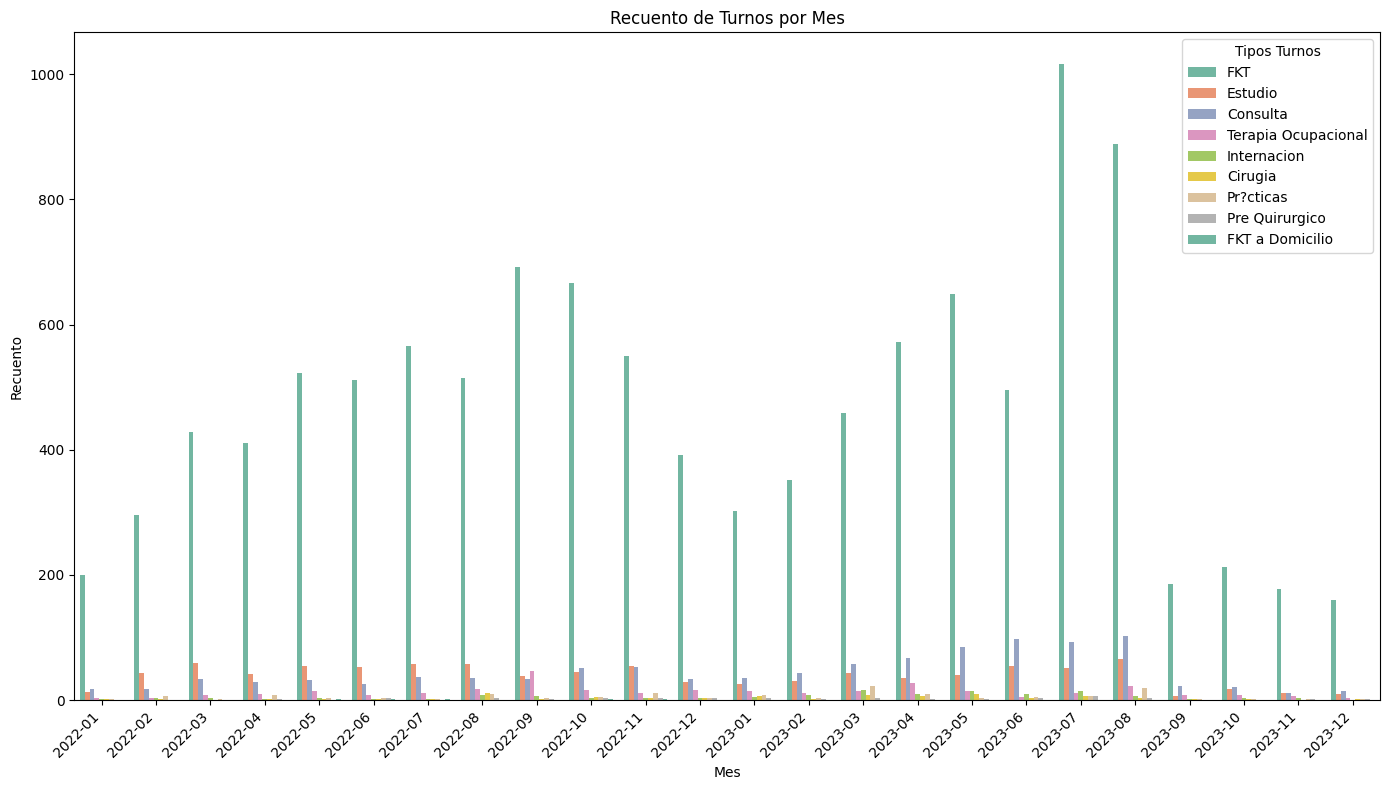

In [ ]:
#Primer Grafico con Seaborn

import matplotlib.pyplot as plt
#Este grafico muestra la cantida de turnos emitidos por mes, pero una barra por cada tipo de turno
TURNOS_MEDICOS_df['Mes'] = TURNOS_MEDICOS_df['Fecha Turno'].dt.to_period('M')

# Crea un gráfico de barras agrupadas por mes de turno y coloreadas por tipo de turno
plt.figure(figsize=(14, 8))
sns.countplot(x="Mes", hue="Tipos Turnos", data=TURNOS_MEDICOS_df, palette="Set2")

# Formateo el grafico
plt.title('Recuento de Turnos por Mes')
plt.xlabel('Mes')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Tipos Turnos')

# Muestra el gráfico
plt.tight_layout()
plt.show()

### Cantidad de turnos clasificados por tipo y por provincia

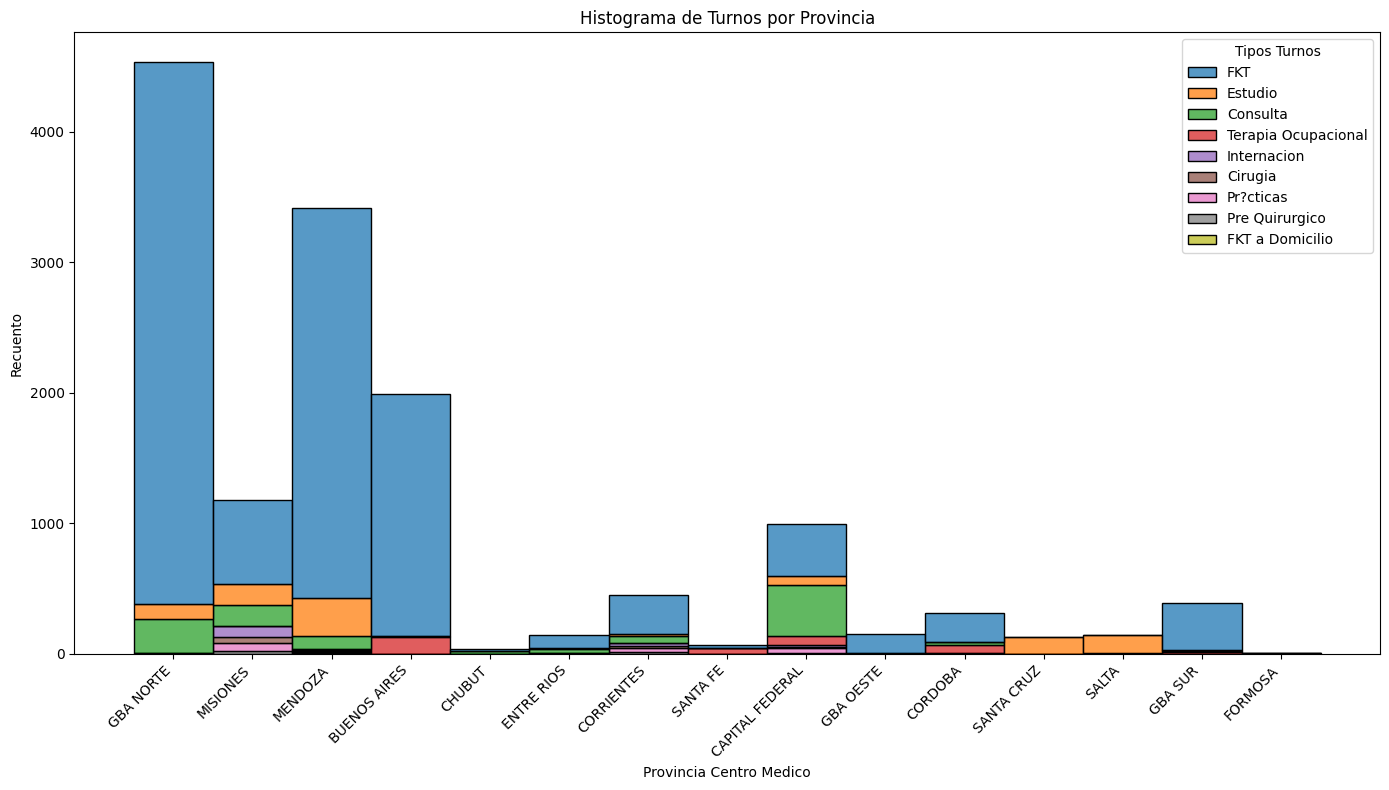

In [ ]:
#Segundo Grafico con Seaborn

# Este grafico muestra un histograma de olumnas apiladas para ver la cantidad de turnos que se realizaron por provincia, y además se agrupa por tipo de turno en varios colores.

plt.figure(figsize=(14, 8))
sns.histplot(data=TURNOS_MEDICOS_df, x="Provincia Centro Medico", hue="Tipos Turnos", binwidth=0.4, multiple="stack")

# Formateo el grafico
plt.title('Histograma de Turnos por Provincia')
plt.xlabel('Provincia Centro Medico')
plt.ylabel('Recuento')

plt.xticks(rotation=45, ha="right")

# Ejecuto el grafico
plt.tight_layout()
plt.show()

Cantida

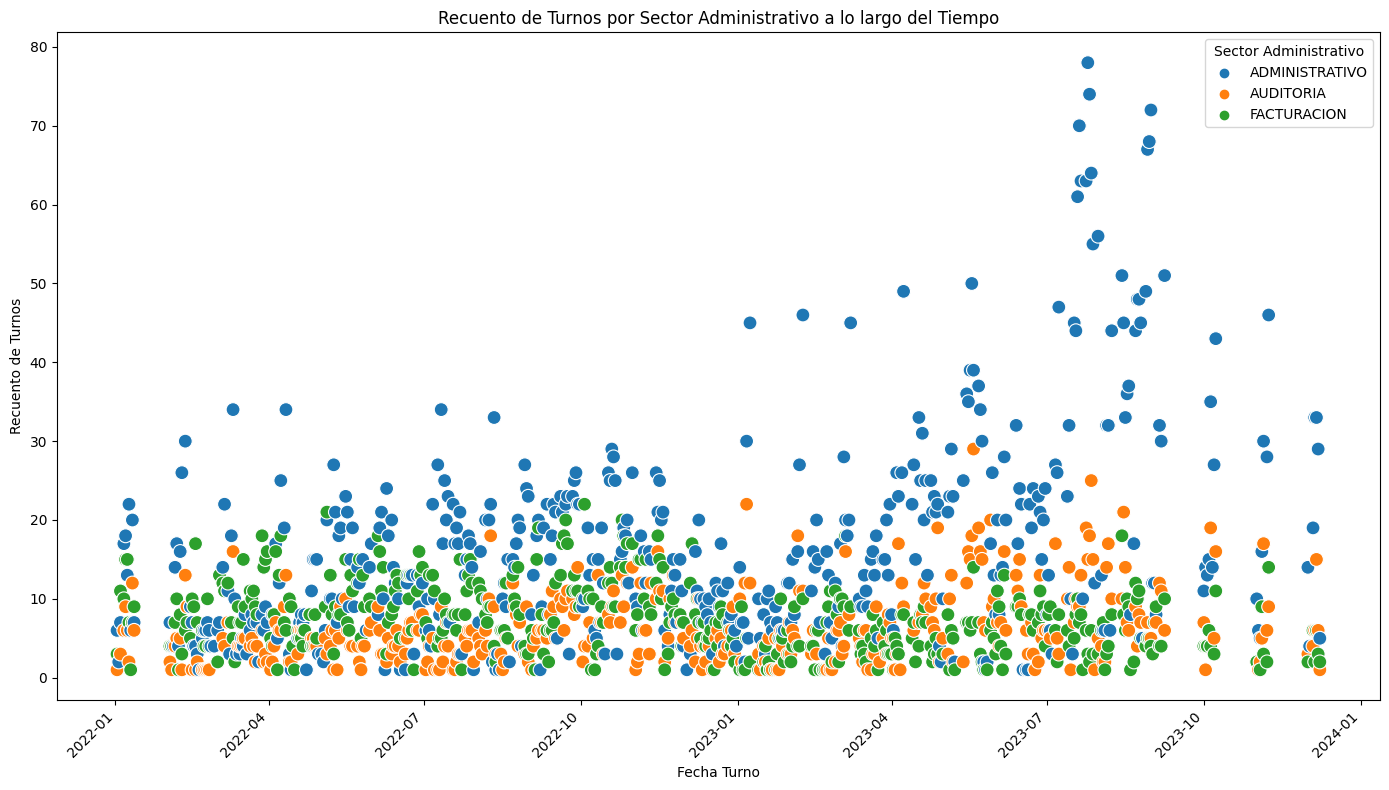

In [ ]:
#Tercer Grafico con Seaborn

turnos_por_fecha_sector = TURNOS_MEDICOS_df.groupby(['Fecha Turno', 'Sector Administrativo'])['Cod Prestacion'].count().reset_index()

# En este grafico muestro la cantidad de turnos que realizó cada sector de la empresa a lo largo  del tiempo, diferenciado por colores.

plt.figure(figsize=(14, 8))
sns.scatterplot(x='Fecha Turno', y='Cod Prestacion', hue='Sector Administrativo', data=turnos_por_fecha_sector, s=100)

# Formateo
plt.title('Recuento de Turnos por Sector Administrativo a lo largo del Tiempo')
plt.xlabel('Fecha Turno')
plt.ylabel('Recuento de Turnos')
plt.legend(title='Sector Administrativo')

plt.xticks(rotation=45, ha="right")

# Muestra el gráfico
plt.tight_layout()
plt.show()